<a href="https://colab.research.google.com/github/wenxuan0923/My-notes/blob/master/DL_example_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning: Binary Classification 
#### - IMDB Reviews data
Sentiment analysis with binary output: 
* 0 - Negative 
* 1 - Positive

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

The review data already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers. 
Each integer stands for a specific word in a dictionary.

In [0]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [0]:
# The dictionary thes dataset used to map words to numerical values
word_index = imdb.get_word_index()
# Reverse it to map numbers back to words 
inv_word_index = {v: k for k, v in word_index.items()}

In [0]:
# To revert list of numbers back to text
' '.join([inv_word_index[idx] for idx in train_data[0]])

"the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have t

In [0]:
print('Train data shape: {}'.format(train_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Train data shape: (25000,)
Test data shape: (25000,)


In [0]:
# Lables are binary: 0 - negative and 1 - positive 
train_labels

array([1, 0, 0, ..., 0, 1, 0])

Each review has different length:

In [0]:
# Lengh of reviews in train dataset
np.array([len(lst) for lst in train_data])

array([218, 189, 141, ..., 184, 150, 153])

#### Prepare the data

#### 1. Vectorize input data
You can't feed list of intergers of different lengths in to a neural network. You have to turn your list into tensors. There are two ways to do that:
1. **Pad** your lists so that they all have the same length, turn them into an integer tensor of shape (samples, word_indices) <br>
2. **One-hot encode** your lists to turn them into vectors of 0s and 1s. In our case we have 10,000 unique words in the whole text dataset. Each list (sentence) can be turned 10,000-dimensional vector that would be all 0s, except for the indices of the words in that sentence which would be 1s.

Let's go with the second option:

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

What this function `vectorize_sequences` does can be illustrated by a simple example below:

In [0]:
tmp = np.zeros((2,3))
tmp

array([[0., 0., 0.],
       [0., 0., 0.]])

In [0]:
a = [0, 1]
b = [1, 2]
tmp[0, a] = 1
tmp[1, b] = 1
tmp

array([[1., 1., 0.],
       [0., 1., 1.]])

In [0]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
y_train = np.asarray(train_labels)
y_test = np.asarray(test_labels)

In [0]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

Now the data is ready to be fed into a neural network.

In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
# Define the architecture of the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# Config the model 
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
# We have 25000 data in the training set, we can create a validation set from it
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

While training the model using partial_x_train data, you will also monitor loss and accuracy on the validation set by passing the validation data as the `validation_data` argument. The evaluation metrics for validation set will be prefixed by `val_`.

In [0]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.5155 - accuracy: 0.8018 - val_loss: 0.4061 - val_accuracy: 0.8632
Epoch 2/20
15000/15000 [==============================] - 1s 92us/step - loss: 0.3220 - accuracy: 0.9001 - val_loss: 0.3222 - val_accuracy: 0.8768
Epoch 3/20
15000/15000 [==============================] - 1s 91us/step - loss: 0.2377 - accuracy: 0.9255 - val_loss: 0.2861 - val_accuracy: 0.8867
Epoch 4/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1875 - accuracy: 0.9379 - val_loss: 0.2785 - val_accuracy: 0.8881
Epoch 5/20
15000/15000 [==============================] - 1s 90us/step - loss: 0.1519 - accuracy: 0.9510 - val_loss: 0.2805 - val_accuracy: 0.8873
Epoch 6/20
15000/15000 [==============================] - 1s 89us/step - loss: 0.1244 - accuracy: 0.9606 - val_loss: 0.2964 - val_accuracy: 0.8847
Epoch 7/20
15000/15000 [==============================] - 1s 89us/st

**Note:** : The call to `model.fit()` returns a History object rather than the fitted model. This object has a member **history**, which is a dictionary containing data about everything that happened during training. The model we will use for prediction is the one we defined our architecture and fit the training data with.

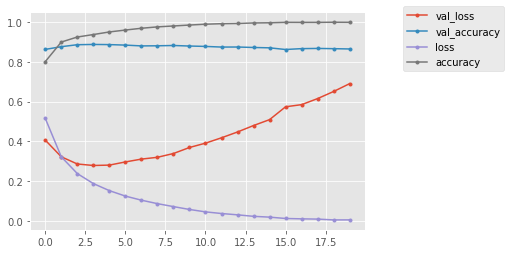

In [0]:
ax = pd.DataFrame(History.history).plot(marker='.')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

From the plot we can see:

* Training loss decreases with every epoch
* Training accuracy increases with every epoch
* Valication loss decrese first and then increase after about 2 epochs
* Validation accuracy increase first and then decrese after about 2 epochs

This shows significant overfitting, meaning you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

Let's train a new model from scrach with smaller number of epochs.


In [0]:
# Define the architecture of the model
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# Config the model 
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

new_history =  model.fit(
    partial_x_train,
    partial_y_train,
    epochs=4,
    batch_size=512,
    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 111us/step - loss: 0.5170 - accuracy: 0.7763 - val_loss: 0.3787 - val_accuracy: 0.8673
Epoch 2/4
15000/15000 [==============================] - 1s 92us/step - loss: 0.2981 - accuracy: 0.9043 - val_loss: 0.3067 - val_accuracy: 0.8815
Epoch 3/4
15000/15000 [==============================] - 1s 94us/step - loss: 0.2213 - accuracy: 0.9271 - val_loss: 0.2779 - val_accuracy: 0.8913
Epoch 4/4
15000/15000 [==============================] - 1s 93us/step - loss: 0.1715 - accuracy: 0.9439 - val_loss: 0.2941 - val_accuracy: 0.8816


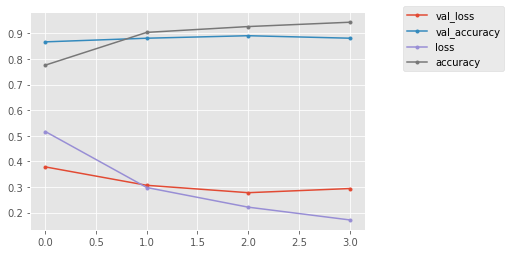

In [0]:
ax = pd.DataFrame(new_history.history).plot(marker='.')
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

The plot looks better now, the gap between training loss and validation loss is not very big. Same with valication accuracy and training accuracy. 

#### Make prediction on new data 

With a trained network, you are able to make prediction on new data. `model.predict()` function will output the probability (a value between 0-1) of each sample below to class 1.


In [0]:
probas = model.predict(x_test)
probas

array([[0.18348825],
       [0.9993181 ],
       [0.78889334],
       ...,
       [0.08114952],
       [0.08768386],
       [0.40837294]], dtype=float32)

In [0]:
# Convert the probability to labels (classes)
(probas < 0.5).astype(np.int)

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]])